# Attempt to solve Fashion MNIST Dataset using Dense Neural Network
## Bibliography 
* Keras official Tutorial
* Deep Learning with Python by François Chollet

## About DataSet 
**Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.**


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os

2024-03-05 18:56:02.964240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 18:56:02.964362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 18:56:03.083989: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load Dataset and Split it to test and train set

see this link
https://medium.com/the-data-science-publication/how-to-import-and-display-the-fashion-mnist-dataset-using-tensorflow-e72522f684d0

In [2]:
#Getting training and testing data from tensorflow
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


28*28 image pixels

In [3]:
#Training Set shape
train_images.shape

(60000, 28, 28)

In [4]:
#Test Set consists of 10000 samples with one label field and 28*28 image pixels
test_images.shape

(10000, 28, 28)

In [5]:
#Labels from 0 to 9 are following Items 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Split training data to train and valid

In [6]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

## Some images with their labels 

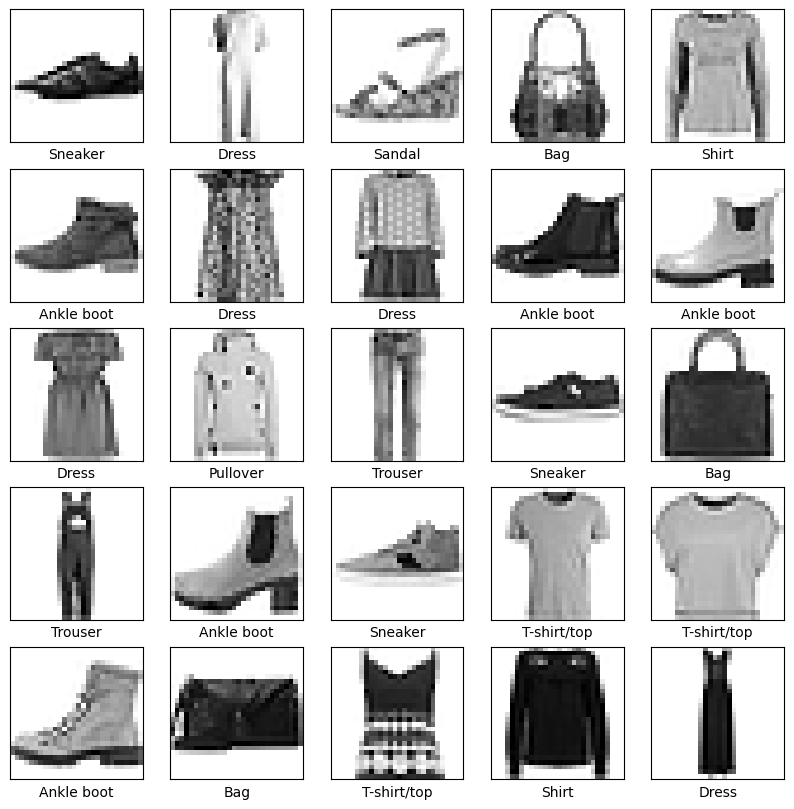

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [8]:
# Rescaling training to range 0 to 1 by dividing them by 255
X_train = X_train / 255.0
X_val = X_val / 255.0

**Creating a Deep Neural Network with any number of layer you want.**

In [9]:
model = models.Sequential([
    layers.Conv2D(
        filters=64,
        kernel_size=(2,2), 
        activation='relu', 
        input_shape=(28, 28, 1)
    ),
    layers.AveragePooling2D(pool_size=(2,2)),
    
    layers.Conv2D(32, kernel_size=(2,2), activation='relu'),
    layers.AveragePooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    
    layers.Dense(10,activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


**Compiling the model.**

In [10]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 13, 13, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,074 (78.41 KB)

 Trainable params: 20,074 (78.41 KB)

 Non-trainable params: 0 (0.00 B)

**Training model with a part of training data and evaluating it with another part of training data
and get more than 90% val_acc**

In [12]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/20
 75/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3724 - loss: 1.8070

I0000 00:00:1709665021.919634     120 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709665021.935184     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


737/750 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6794 - loss: 0.9105

W0000 00:00:1709665024.123958     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6810 - loss: 0.9056 - val_accuracy: 0.8334 - val_loss: 0.4714
Epoch 2/20
 79/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8260 - loss: 0.4654

W0000 00:00:1709665025.024585     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8373 - loss: 0.4512 - val_accuracy: 0.8611 - val_loss: 0.3949
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8578 - loss: 0.3940 - val_accuracy: 0.8677 - val_loss: 0.3826
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8657 - loss: 0.3728 - val_accuracy: 0.8733 - val_loss: 0.3571
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8783 - loss: 0.3461 - val_accuracy: 0.8797 - val_loss: 0.3454
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8808 - loss: 0.3378 - val_accuracy: 0.8842 - val_loss: 0.3275
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8835 - loss: 0.3247 - val_accuracy: 0.8807 - val_loss: 0.3370
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8898 - loss: 0.3092 - val_accuracy: 0.8873 - val_loss: 0.3144
Epoch 9/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8912 - loss: 0.3040 - val_accuracy: 0.8923 - val_

# Visualize Model Training History in Keras

See this link
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

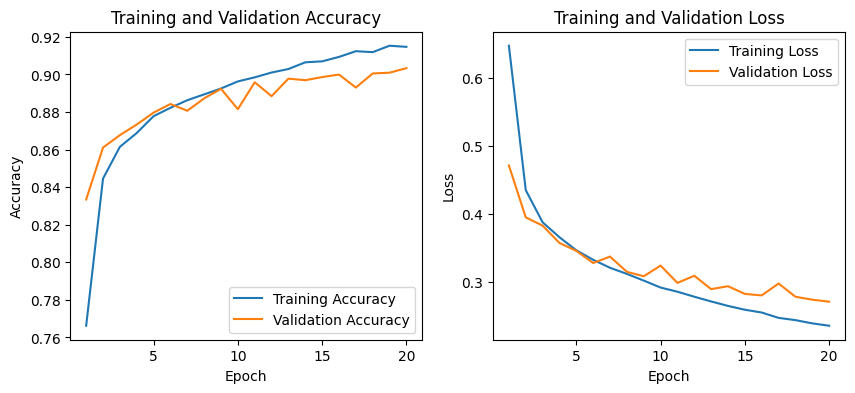

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
    
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Evaluate the model with our Test Set Using confusion_matrix

-split data to X_test and Y_test
-Rescaling training to range 0 to 1 by dividing them by 255

In [14]:
test_images = test_images / 255.0

predictions = model.predict(test_images)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 1600x1200 with 0 Axes>

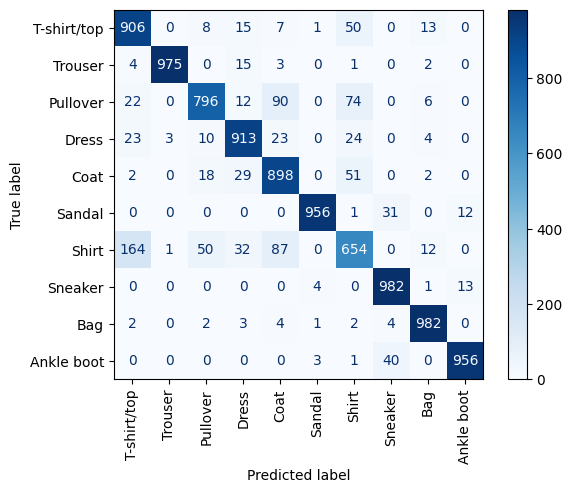

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)

plt.figure(figsize=(16, 12))
disp.plot(cmap=plt.cm.Blues, values_format="d", xticks_rotation='vertical')

plt.show()


visualization

In [16]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.90      0.80      0.85      1000
           3       0.90      0.91      0.90      1000
           4       0.81      0.90      0.85      1000
           5       0.99      0.96      0.97      1000
           6       0.76      0.65      0.70      1000
           7       0.93      0.98      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Find classification_report for the prediction

Use model.evaluate the test data

In [17]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9035 - loss: 0.2880


W0000 00:00:1709665203.589570     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.28602495789527893, 0.9017999768257141]